## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns

In [2]:
#открываем файл с данными
df = pd.read_csv('..../games.csv')

#вывод первых 5 строк таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов и 16715 строк типы данных (по столбцам): `float64`(6), `object`(5).

Описание столбцов:

* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска (данные за 2016 год могут быть неполными);
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB.

*Примечание*

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию:*

- *«K-A» — «Для детей» (позже, в 1998 году, был переименован в «E»);*
- *«EC» («Early childhood») — «Для детей младшего возраста»;*
- *«E» («Everyone») — «Для всех»;*
- *«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;*
- *«T» («Teen») — «Подросткам 13—19 лет»;*
- *«M» («Mature») — «От 17 лет»;*
- *«AO» («Adults Only 18+») — «Только для взрослых»;*
- *«RP» («Rating Pending») — «Рейтинг ожидается».*

Количество значений в 6 из 11 столбцов различается. Значит, в данных есть пропущенные значения.

Все названия столбцов нужно привести к одному регистру.

Также в таблице есть столбцы типы данных в которых необходимо заменить на более подходящие: `Year_of_Release` указан как `float64`, логичнее год указывать целым числом, без плавающей точки, столбец `User_Score` указан как `object`, логичнее указать `float`.



<div style="border:solid green 1px; padding: 10px">

В каждой строке таблицы — исторические данные о продажах игр в разных частях света и дате их выпуска, оценки пользователей и экспертов, рейтинг ESRB, жанры и платформы.

Предварительно можно утверждать, что данных достаточно для оопределения закономерностей успешности игр.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Приведем названия столбцов к одному регистру.

Устраним пропуски в данных и проверим таблицу на дубликаты.

Изменим типы данных в столбцах на подходящие.

### Стиль столбцов и обработка пропусков

In [4]:
# переименование столбцов
df.columns = df.columns.str.lower()

In [5]:
# приведение значений к нижнему регистру
df['platform'] = df['platform'].str.upper()
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()

In [6]:
# поиск и подсчет пропусков в столбцах
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# доля пропущенных значений в каждом из столбцов с пропусками
print(df['year_of_release'].isna().sum() / df.shape[0] * 100)
print(df['name'].isna().sum() / df.shape[0] * 100)
print(df['critic_score'].isna().sum() / df.shape[0] * 100)
print(df['user_score'].isna().sum() / df.shape[0] * 100)
df['rating'].isna().sum() / df.shape[0] * 100

1.609332934489979
0.011965300628178284
51.31917439425665
40.08973975471134


40.478612025127134

Столбцов с пропущенными значениями достаточно много. Причины возникновения пропусков могут быть технологическими. Такие ошибки возникают при копировании, считывании, смене формата. Сбой может произойти даже во время записи данных. 

Для некоторых пропущенных значений можно предположить логичную замену - в столбце `rating` пропуски можно заполнить значением `unk` (unknown). 
Мы можем удалить не больше 5-7% датафрейма без существенных последствий для результатов исследования. Пропуски в  столбцах `name` и `genre` составляют меньше 1% от общего числа записей, а в столбце `year_of_release` 1,6%, удалим их.

В столбце `user_score` есть значение `tbd`. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Можно предположить, что пользователь еще не решил для себя как (на сколько) оценить игру. Для нас это тоже самое, что и отсутствие значения.

Заполнить пропуски в столбцах `critic_score`, `user_score` медианным значением в зависимости от жанра игры, потому что для анализа количественных переменных важно учитывать, что в данных могут содержаться "выбросы" - сильно заниженные или завышенные, по сравнению с остальными, данные, а значит среднее будет смещено относительно реального положения вещей.

In [9]:
#удаление пропусков
df = df.dropna(subset=['name', 'year_of_release'])

In [10]:
#заполнение пропусков
df['rating'] = df['rating'].fillna('unk')

In [11]:
#замена 'tbd' значений на нулевые
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [12]:
# изменениe типа данных
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')

In [13]:
# заполнение critic_score медианой в зависимости от жанра
def add_median_crit(df):
    median = df['critic_score'].median()
    df.loc[pd.isna(df['critic_score']), 'critic_score'] = median
    return df

df_with_median = df.groupby('genre').apply(add_median_crit)

In [14]:
# заполнение user_score медианой в зависимости от жанра
def add_median_usr(df_with_median):
    median = df_with_median['user_score'].median()
    df_with_median.loc[pd.isna(df_with_median['user_score']), 'user_score'] = median
    return df_with_median

df_with_median = df_with_median.groupby('genre').apply(add_median_usr)

In [15]:
df_with_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


### Проверка данных на аномалии, исправления, дубликаты

In [16]:
# выводим уникальные значения названий игр
df_with_median['name'].sort_values().unique()

array([' beyblade burst', ' fire emblem fates', " frozen: olaf's quest",
       ' haikyu!! cross team match!', ' tales of xillia 2', "'98 koshien",
       '.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)',
       '.hack//g.u. vol.3//redemption', '.hack//infection part 1',
       '.hack//link', '.hack//mutation part 2', '.hack//outbreak part 3',
       '.hack//quarantine part 4: the final chapter',
       '.hack: sekai no mukou ni + versus', '007 racing',
       '007: quantum of solace', '007: the world is not enough',
       '007: tomorrow never dies', '1 vs. 100', '1/2 summer +',
       '10 minute solution', '100 all-time favorites',
       '100 classic books', '100 classic games',
       '1000 cooking recipes from elle à table', '1001 touch games',
       '101-in-1 explosive megamix', '101-in-1 party megamix wii',
       '101-in-1 sports megamix', '101-in-1 sports party megamix',
       '1080°: teneighty snowboarding', '11e

Есть названия в пробелами до и после, есть "." перед названиями, какие-то названия в ковычках, а другие нет. Уберем лишние символы.

In [17]:
df_with_median['name'] = df_with_median['name'].str.strip()
df_with_median['name'] = df_with_median['name'].str.lstrip(".")
df_with_median['name'] = df_with_median['name'].str.strip("'")
df_with_median['name'] = df_with_median['name'].str.strip('"')

In [18]:
#проверка на наличие явных дубликатов
df_with_median.duplicated().sum()

0

### Расчёты и добавление результатов в таблицу

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец таблицы.

In [19]:
df_with_median['total_sales'] = df_with_median[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
df_with_median.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,WII,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,69.5,7.7,unk,40.24
2,mario kart wii,WII,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,WII,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,74.0,7.8,unk,31.38


## Исследовательский анализ данных

Посмотрим:

* сколько игр выпускалось в разные годы.
* как менялись продажи по платформам.
* возьмем данные за актуальный период (который определим в результате исследования предыдущих вопросов) — эти данные помогут построить прогноз на 2017 год. За предыдущие годы данные в работе учитывать не будем.
* какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.
* построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
* как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
* соотнесем выводы с продажами игр на других платформах.
* на общее распределение игр по жанрам.

### Cколько игр выпускалось в разные годы

In [21]:
df_with_median['year_of_release'].value_counts().reset_index().sort_values('index')

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
29,1983,17
35,1984,14
34,1985,14
28,1986,21
32,1987,16
33,1988,15
30,1989,17


<div style="border:solid green 1px; padding: 10px">
Меньше всего игр пришлось на 1980г., а больше всего выпустили в 2008г. Быстрое увеличение количества выпускаемых игр началось с 1994г., но резкий скачек произошел в 2002г., возможно стоит ограничиться данными начиная с этого года.

In [22]:
df_with_median = df_with_median.query('year_of_release >= 2002')

### Kак менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами, скажем от 100 млн. копий, и посмотрим на распределение продаж по годам:

In [23]:
#выбираем платформы с суммарной выручкой больше 100 млн. копий
plat_sales = (df_with_median.groupby('platform')['total_sales'].sum()
              .sort_values(ascending=False).reset_index().query('total_sales >=100')['platform']
             )
plat_sales

0      PS2
1     X360
2      PS3
3      WII
4       DS
5      PS4
6      PSP
7      3DS
8      GBA
9       XB
10      PC
11      GC
12    XONE
Name: platform, dtype: object

In [65]:
# группируем по годам и платформам
gr_df = (df_with_median
         .query('platform in @plat_sales')
         .pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()
        )
# распределение продаж по годам
years = gr_df['year_of_release'].unique()
for year in years:
    (print('Год:', year, 'сумма продаж:', round(gr_df.query('year_of_release == @year')['total_sales'].sum(), 2),
           'платформ:', gr_df.query('year_of_release == @year')['platform'].count()))

Год: 2002 сумма продаж: 387.93 платформ: 5
Год: 2003 сумма продаж: 355.47 платформ: 5
Год: 2004 сумма продаж: 418.68 платформ: 7
Год: 2005 сумма продаж: 457.82 платформ: 8
Год: 2006 сумма продаж: 517.71 платформ: 10
Год: 2007 сумма продаж: 604.73 платформ: 10
Год: 2008 сумма продаж: 671.46 платформ: 8
Год: 2009 сумма продаж: 658.82 платформ: 7
Год: 2010 сумма продаж: 590.13 платформ: 7
Год: 2011 сумма продаж: 502.95 платформ: 8
Год: 2012 сумма продаж: 322.09 платформ: 7
Год: 2013 сумма продаж: 329.0 платформ: 9
Год: 2014 сумма продаж: 297.6 платформ: 8
Год: 2015 сумма продаж: 245.38 платформ: 8
Год: 2016 сумма продаж: 121.09 платформ: 7


<div style="border:solid green 1px; padding: 10px">
    Распределение суммы продаж по годам говорит, что больше всего продано копий в тот же год, что и выпущено максимальное количество игр - 2008г., далее идет спад. 

### Данные для прогноза на 2017 год

Возьмем данные за период в 2 года с 2014г. по 2015г. и 2016г. (в описании данных говорилось, что 2016г. может быть не полным по данным, поэтому 2 года и "довесок"). Эти данные помогут построить прогноз на 2017 год.

In [25]:
analyzed_period = df_with_median.query('year_of_release >=2014')
analyzed_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,73.0,7.4,unk,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,74.0,7.8,unk,11.68
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,73.0,7.4,unk,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,66.0,7.6,unk,0.01
16707,aiyoku no eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,69.0,7.1,unk,0.01
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,68.0,7.4,unk,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,66.0,7.6,unk,0.01


### Выберем несколько потенциально прибыльных платформ

In [26]:
sales_leaders = (
    analyzed_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .reset_index().sort_values('total_sales', ascending=False)
)
sales_leaders

,platform,total_sales
3,PS4,288.15
9,XONE,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WIIU,42.98
1,PC,27.05
5,PSV,22.40
6,WII,5.07
4,PSP,0.36


У 10 платформ суммарная выручка за анализируемый период выше 20 млн. копий. Их и оставим.

In [27]:
sales_leaders = sales_leaders.head(8)

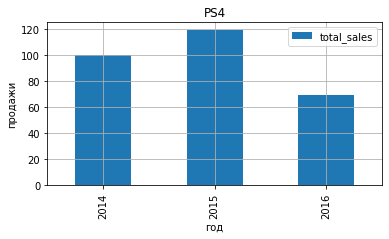

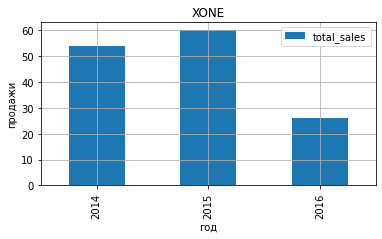

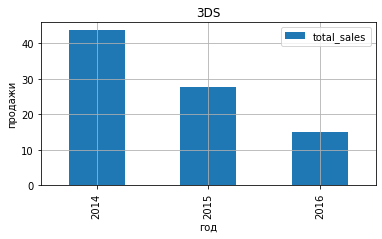

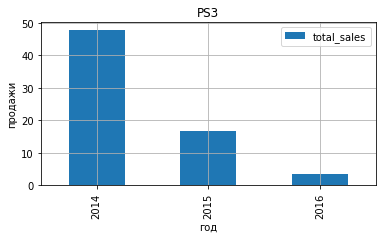

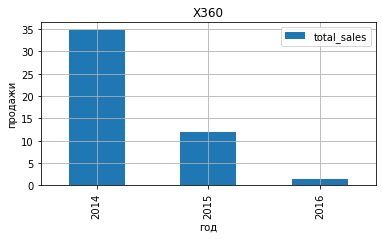

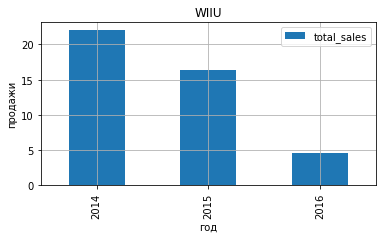

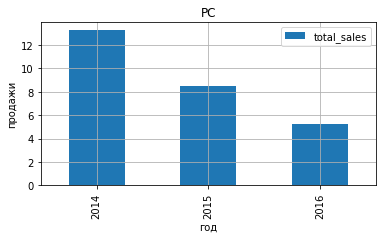

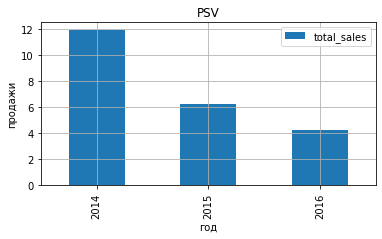

In [28]:
#построим графики по динамике продаж
platform = sales_leaders['platform'].unique()
for plat in platform:
    (analyzed_period.query('platform==@plat')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
     .plot(x='year_of_release', y='total_sales',
           kind='bar', figsize=(6,3), grid=True, xlabel='год', ylabel='продажи',
          )
    )
    plt.title(plat)

<div style="border:solid green 1px; padding: 10px">
Из графиков видно, что:

* `PS4` - пик 2015г., но т.к. данные за 2016г. возможно не полные, нельзя одназначно говорить, что в 2016г. идет спад;
* `XOne` - пик 2015г., но т.к. данные за 2016г. возможно не полные, нельзя одназначно говорить, что в 2016г. идет спад;
* `3DS` - пик в 2014г., далее равномерный спад к 2016г. (но в этот год все еще более 10 млн.копий, а если данные не полные, то, возможно и больше);
* `PS3` - пик в 2014г. и к 2016г. игры также почти не продаются, скорее всего из-за выхода PS4;
* `X360` - пик в 2014г. и к 2016г. игры также почти не продаются, скорее всего из-за выхода XOne;
* `WiiU` - пик в 2014г., 2015г. также не плох, а вот в 2016г. уже дела похуже;
* `РС` - пик 2014г. и плавный спад к 2016г. (но в этот год все еще более 5 млн.копий, а если данные не полные, то, возможно и больше);
* `PSV` - пик в 2014г., далее равномерный спад к 2016г. (но в этот год все еще более4 млн.копий, а если данные не полные, то, возможно и больше);

Определим несколько платформ как ТОП-5: 

- `PS4`, `XOne` как стационарные консоли;
- `3DS`, `PSV` как портативные консоли;
- `РС` как альтернативную консолям платформу.

Ограничим анализируемый период выбранным списком ТОП-5 платформ:

In [29]:
top_plat = ['PS4', '3DS', 'XONE', 'PSV', 'PC']
top_5_plat = analyzed_period.query('platform in @top_plat')

### Диаграмма размаха 

График «ящик с усами» (или диаграмма размаха) показывает характерный разброс — то, какие значения оказались вдали от среднего, и насколько их много. Если считать характерным разбросом расстояние между минимальным и максимальным значением, то мы не всегда получим точное описание данных, на него могут повлиять выбросы. Поэтому, в качестве характерного разброса применяют межквартильный размах.
Квартили разбивают упорядоченный набор данных на четыре части:
* первый квартиль Q1 — число, отделяющее первую четверть выборки 25% элементов меньше, а 75% — больше него);
* медиана — второй квартиль Q2 (половина элементов больше и половина меньше неё);
* третий квартиль Q3 — это отсечка трёх четвертей 75% элементов меньше и 25% элементов больше него).

Межквартильный размах — это расстояние между первым квартилем Q1 и третьим квартилем Q3. Диаграмма размаха позволяет отобразить все квартили для заданных данных. «Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану. «Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (IQR). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого уса.

Стандартное отклонение — числовая характеристика данных, входящая в числовое описание данных и характеризующая разброс величин, показывает, насколько значения в выборке отличаются от среднего арифметического. Оно позволяет понять природу распределения и определить, насколько значения однородны.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

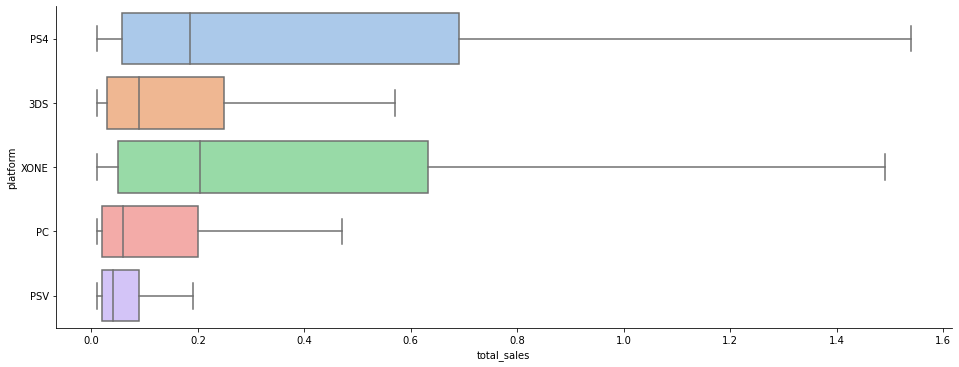

In [66]:
box_sales = (sns.catplot(y='platform', x='total_sales', kind="box", data= top_5_plat, orient='h', showfliers=False,
                         palette = 'pastel')
            )
box_sales.fig.set_figwidth(15)
box_sales.fig.set_figheight(5)

In [31]:
top_5_plat.query('platform=="PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

<div style="border:solid green 1px; padding: 10px">
    
По платформе `PS4`:
* 376 значений в выборке;
* Q1 — 25% выборки не больше 0.0575;
* медиана - на значении в 0.1850;
* Q3 — 25% выборки больше 0.6900;
* Межквартильный размах — обозначен на графике <font color='blue'>синим</font>;
* есть много значений, выходящие за пределы правого "уса"
* стандартное отклонение — 1.6149, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

In [32]:
top_5_plat.query('platform=="PSV"')['total_sales'].describe()

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: total_sales, dtype: float64

<div style="border:solid green 1px; padding: 10px">

По платформе `PSV`:
* 295 значений в выборке;
* Q1 — 25% выборки не больше 0.0200;
* медиана - на значении в 0.0400;
* Q3 — 25% выборки больше 0.0900;
* Межквартильный размах — обозначен на графике <font color='purple'>фиолетовым</font>;
* есть много значений, выходящие за пределы правого "уса"
* стандартное отклонение — 0.1415, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

In [33]:
top_5_plat.query('platform=="3DS"')['total_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

<div style="border:solid green 1px; padding: 10px">

По платформе `3DS`:
* 212 значений в выборке;
* Q1 — 25% выборки не больше 0.0300;
* медиана - на значении в 0.0900;
* Q3 — 25% выборки больше 0.2500;
* Межквартильный размах — обозначен на графике <font color='orange'>оранжевым</font>;
* есть много значений, выходящие за пределы правого "уса"
* стандартное отклонение — 1.1883, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

In [34]:
top_5_plat.query('platform=="XONE"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

<div style="border:solid green 1px; padding: 10px">
    
По платформе `ХOne`:
* 228 значений в выборке;
* Q1 — 25% выборки не больше 0.0500;
* медиана - на значении в 0.2050;
* Q3 — 25% выборки больше 0.6325;
* Межквартильный размах — обозначен на графике <font color='green'>зеленым</font>;
* есть много значений, выходящие за пределы правого "уса"
* стандартное отклонение — 1.0465, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

In [35]:
top_5_plat.query('platform=="PC"')['total_sales'].describe()

count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64

<div style="border:solid green 1px; padding: 10px">

По платформе `PC`:
* 33 значения в выборке;
* Q1 — 25% выборки не больше 0.0200;
* медиана - на значении в 0.0600;
* Q3 — 25% выборки больше 0.2000;
* Межквартильный размах — обозначен на графике <font color='red'>красным</font>;
* есть много значений, выходящие за пределы правого "уса"
* стандартное отклонение — 0.3293, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

### Влияние отзывов пользователей и критиков на ТОП-5 платформ

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
Общая классификация корреляционных связей:

1) сильная, или тесная при коэффициенте корреляции r>0,70;

2) средняя при 0,50<r<0,69;

3) умеренная при 0,30<r<0,49;

4) слабая при 0,20<r<0,29;

5) очень слабая при r<0,19

PS4  Корреляция между отзывами критиков и продажами: 0.34616355123267817


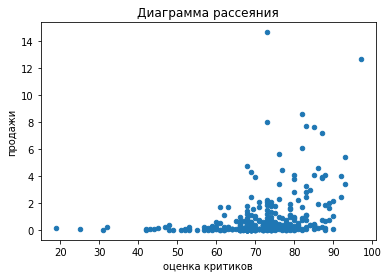

PS4  Корреляция между отзывами пользователей и продажами: -0.06709467337892883


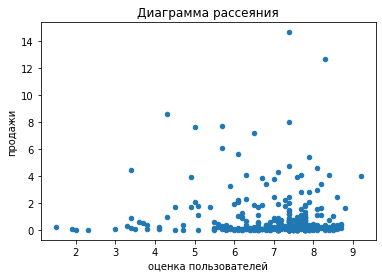

3DS  Корреляция между отзывами критиков и продажами: 0.16978510688086174


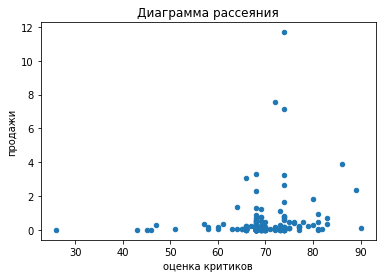

3DS  Корреляция между отзывами пользователей и продажами: 0.0972663680449135


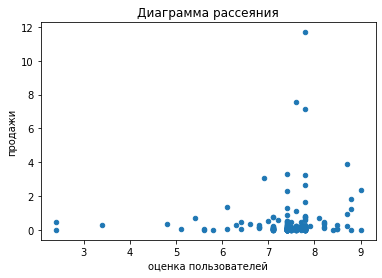

XONE  Корреляция между отзывами критиков и продажами: 0.3941108280719495


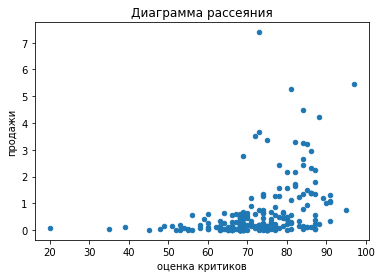

XONE  Корреляция между отзывами пользователей и продажами: -0.09853048267615326


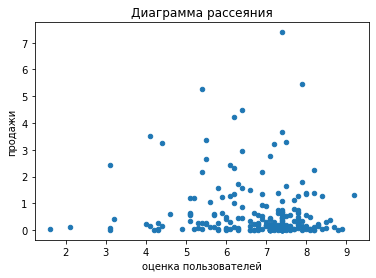

PSV  Корреляция между отзывами критиков и продажами: 0.15796951213313484


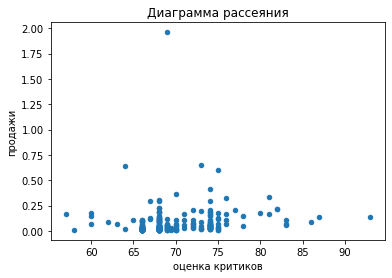

PSV  Корреляция между отзывами пользователей и продажами: -0.07411419994861498


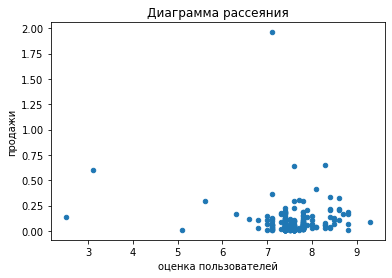

PC  Корреляция между отзывами критиков и продажами: 0.2063170218544067


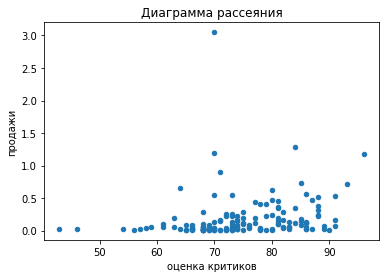

PC  Корреляция между отзывами пользователей и продажами: -0.09764600630626129


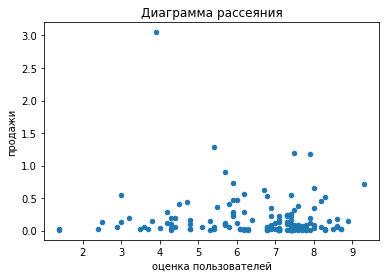

In [68]:
# построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков/пользователей и продажами для ТОП-5 платформ
for plat in top_plat:
    platform = analyzed_period.query('platform == @plat')
    platform.plot(x='critic_score', y='total_sales', kind='scatter', xlabel='оценка критиков', ylabel='продажи')
    plt.title('Диаграмма рассеяния')
    print(plat, ' Корреляция между отзывами критиков и продажами:', platform['critic_score'].corr(platform['total_sales']))
    plt.show()
    platform.plot(x='user_score', y='total_sales', kind='scatter', xlabel='оценка пользователей', ylabel='продажи')
    plt.title('Диаграмма рассеяния')
    (print(plat, ' Корреляция между отзывами пользователей и продажами:', platform['user_score'].
           corr(platform['total_sales'])))
    plt.show()

<div style="border:solid green 1px; padding: 10px">
    
Нет сильной корреляции продаж от отзывов пользователей или критиков по ТОП-5 платформ (умеренная от оценок критиков и слабая от оценок пользователей).

### Общее распределение игр по жанрам

In [37]:
genre_grouped = (
    analyzed_period.groupby('genre')['total_sales'].agg([sum, 'count'])
    .reset_index().sort_values(by='sum', ascending=False)
)
genre_grouped.columns = ['genre', 'total_sales', 'count_games']
genre_grouped

,genre,total_sales,count_games
0,action,199.36,619
8,shooter,170.94,128
10,sports,109.48,161
7,role-playing,101.44,221
3,misc,37.55,113
2,fighting,28.22,60
6,racing,27.52,69
4,platform,18.09,38
1,adventure,17.55,185
9,simulation,13.13,44


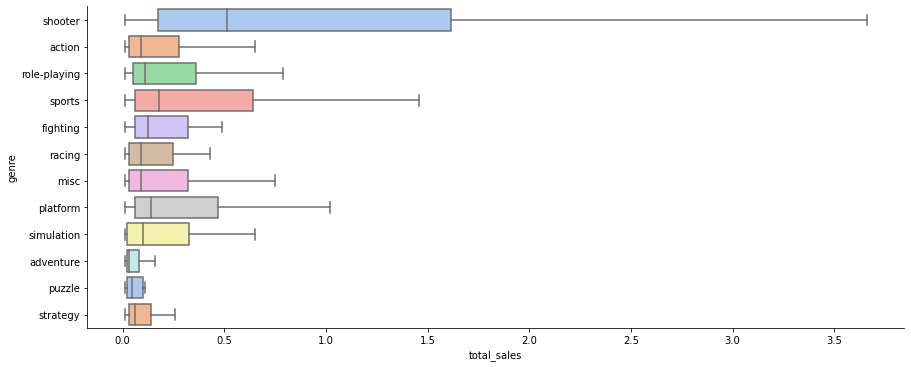

In [69]:
# диаграмма размаха по анализируемому периоду
box_genres = (sns.catplot(y='genre', x='total_sales', kind="box", data= analyzed_period, orient='h',
                          showfliers=False, palette = 'pastel'))
box_genres.fig.set_figwidth(15)
box_genres.fig.set_figheight(5)

In [39]:
#выбор ТОП-5 жанров
top_gen = ['action', 'shooter', 'sports', 'role-playing', 'misc']
top_5_genres = analyzed_period.query('genre in @top_gen')

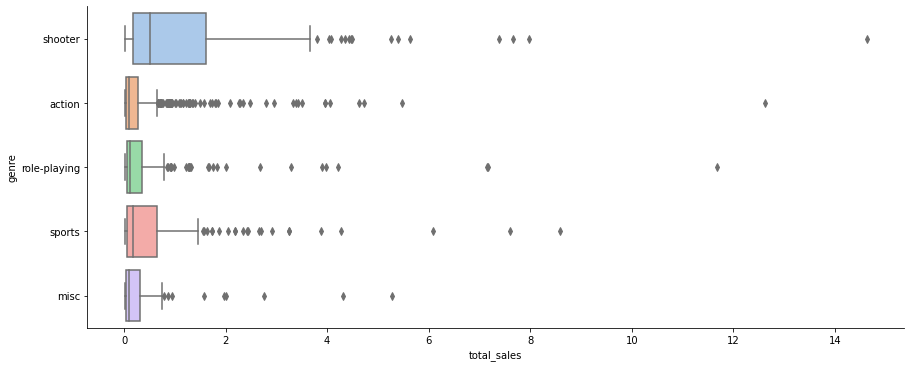

In [40]:
# диаграмма размаха с выбросами
box_genres = sns.catplot(y='genre', x='total_sales', kind="box", data= top_5_genres, orient='h', palette = 'pastel')
box_genres.fig.set_figwidth(15)
box_genres.fig.set_figheight(5)

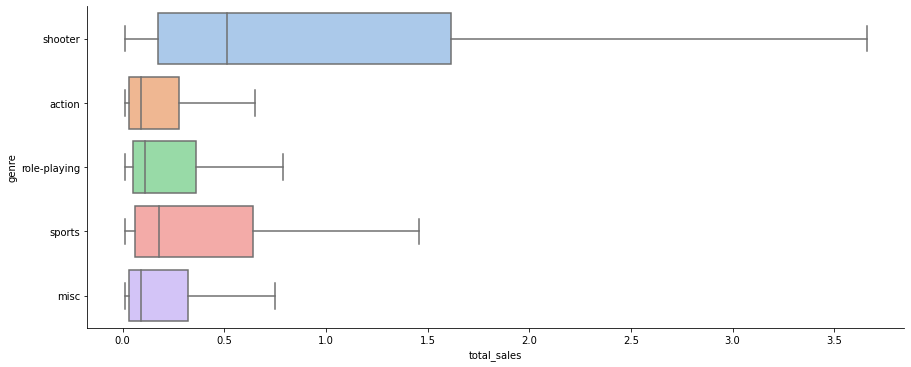

In [70]:
top_5_genres_n2 = analyzed_period.query('genre in @top_gen and total_sales >= 1')
# диаграмма размаха без выбросов
box_genres = (sns.catplot(y='genre', x='total_sales', kind="box", data= top_5_genres, showfliers=False,
                          orient='h', palette = 'pastel'))
box_genres.fig.set_figwidth(15)
box_genres.fig.set_figheight(5)

<div style="border:solid green 1px; padding: 10px">

Самые прибыльные жанры за анализируемый период с 2014г. по 2016г. это `action` (619 игр в размере 199,36 млн. копий), `shooter` (128 игр в размере 170,94 млн. копий), `sports` (161 игрa в размере 109,48 млн. копий), `role-playing` (221 игрa в размере 101,44 млн. копий) и `misc` (113 игр в размере 37,55 млн. копий). Хуже всего продажи шли по жанрам `strategy` и `рuzzle`.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP, других регионов):

* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Самые популярные платформы  и жанры в NA, EU, JP

In [42]:
# самые популярные платформы по регионам
platform_by_region = (analyzed_period
                .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                .reset_index()
)

In [43]:
platform_by_region

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,WII,2.59,0.00,2.08
7,WIIU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XONE,46.25,0.32,81.27


In [44]:
# создаем список топ-5 платформ
na_platforms = platform_by_region.sort_values('na_sales', ascending=False).head()['platform']
eu_platforms = platform_by_region.sort_values('eu_sales', ascending=False).head()['platform']
jp_platforms = platform_by_region.sort_values('jp_sales', ascending=False).head()['platform']

In [45]:
# Доля продаж в регионе от общей суммы продаж по топ-5 платформам
print('Доля продаж в Японии от общих:', (platform_by_region['jp_sales'].sort_values(ascending=False).head().sum()
 / analyzed_period.query('platform in @jp_platforms')['total_sales'].sum() * 100
))
print('Доля продаж в Европе от общих:', (platform_by_region['eu_sales'].sort_values(ascending=False).head().sum()
 / analyzed_period.query('platform in @eu_platforms')['total_sales'].sum() * 100
))
print('Доля продаж в Северной Америке от общих:', (platform_by_region['na_sales'].sort_values(ascending=False).head().sum()
 / analyzed_period.query('platform in @na_platforms')['total_sales'].sum() * 100
))

Доля продаж в Японии от общих: 18.161254155274474
Доля продаж в Европе от общих: 38.64879918744474
Доля продаж в Северной Америке от общих: 40.037049351636384


<div style="border:solid green 1px; padding: 10px">

За анализируемый период с 2014г. по 2016г. топ-5 платформ:

- в Северной Америке 
    `PS4` (98.61), `XOne` (81.27), `X360` (28.30), `3DS` (22.64), `PS3` (22.05) и продажи в этом регионе составляют чуть больше 40% от общих продаж по этим платформам;
- в Европе - `PS4` (130.04), `XOne` (46.25), `PS3` (25.54), `PC` (17.97), `3DS` (16.12)  и продажи в этом регионе составляют чуть больше 38% от общих продаж по этим платформам;
- в Японии - `3DS` (44.24), `PS4` (15.02), `PSV` (14.54), `PS3` (11.22), `Wiiu` (7.31)  и продажи в этом регионе составляют чуть больше 18% от общих продаж по этим платформам.

Если соотнести платформы с их "новизной", то наиболее актуальны (на конец 2016г.): `PS4`, `XOne`, `PC`, `3DS`,  `PSV`,  `Wiiu`, что совпадает с выделенным нами ранее списком ТОП-5 платформ.

Построим графики по продажам в регионах по ТОП-5 платформ и по остальным платформам.

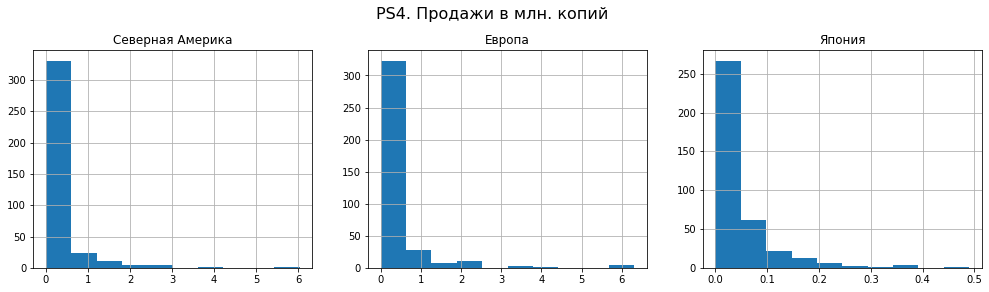

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('PS4. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(top_5_plat.query('platform=="PS4"')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(top_5_plat.query('platform=="PS4"')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(top_5_plat.query('platform=="PS4"')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

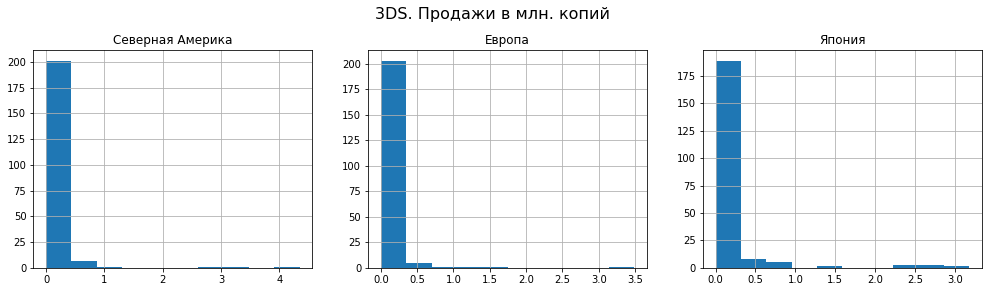

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('3DS. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(top_5_plat.query('platform=="3DS"')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(top_5_plat.query('platform=="3DS"')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(top_5_plat.query('platform=="3DS"')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

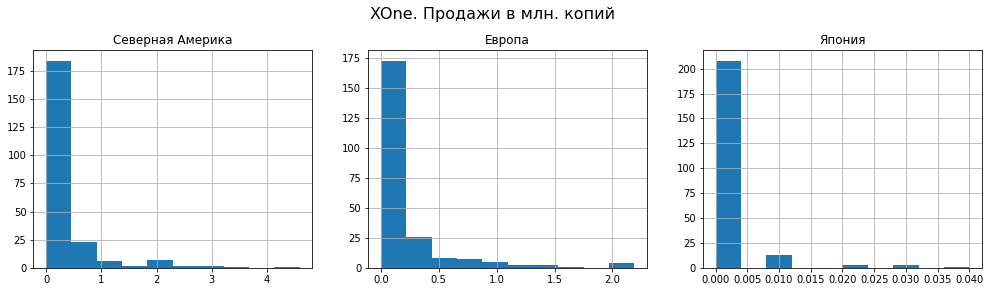

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('XOne. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(top_5_plat.query('platform=="XONE"')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(top_5_plat.query('platform=="XONE"')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(top_5_plat.query('platform=="XONE"')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

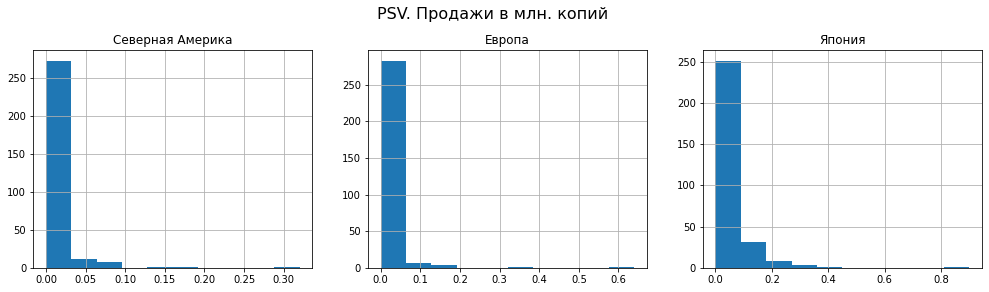

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('PSV. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(top_5_plat.query('platform=="PSV"')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(top_5_plat.query('platform=="PSV"')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(top_5_plat.query('platform=="PSV"')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

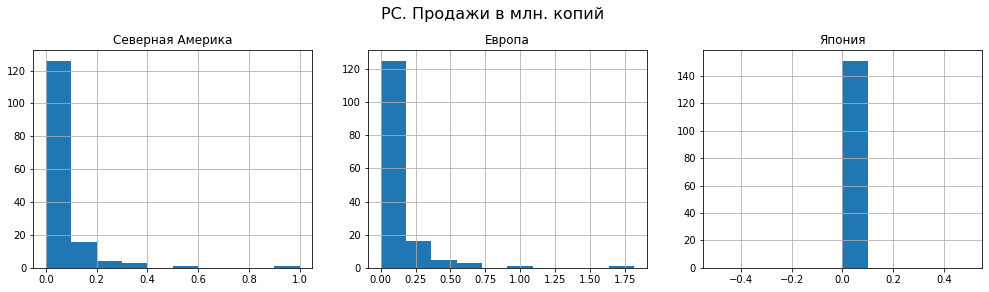

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('PC. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(top_5_plat.query('platform=="PC"')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(top_5_plat.query('platform=="PC"')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(top_5_plat.query('platform=="PC"')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

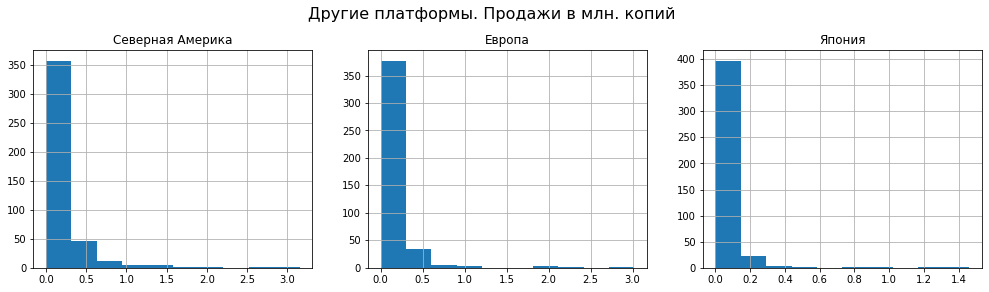

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('Другие платформы. Продажи в млн. копий', fontsize=16, y=1.03)
axes[0].hist(analyzed_period.query('platform not in @top_plat')['na_sales'])
axes[0].set_title('Северная Америка')
axes[0].grid()

axes[1].hist(analyzed_period.query('platform not in @top_plat')['eu_sales'])
axes[1].set_title('Европа')
axes[1].grid()

axes[2].hist(analyzed_period.query('platform not in @top_plat')['jp_sales'])
axes[2].set_title('Япония')
axes[2].grid()

In [52]:
# самые популярные жанры по регионам
genre_by_region = (analyzed_period
                .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                .reset_index()
)

In [53]:
genre_by_region.sort_values(by='jp_sales', ascending=False)

,genre,eu_sales,jp_sales,na_sales
7,role-playing,28.17,31.16,33.47
0,action,74.68,29.58,72.53
2,fighting,6.69,6.37,12.43
3,misc,12.86,5.61,15.05
8,shooter,65.52,4.87,79.02
1,adventure,6.49,3.60,5.64
10,sports,45.73,3.26,46.13
4,platform,6.80,2.69,6.79
9,simulation,7.30,2.31,2.63
6,racing,14.13,1.76,8.74


<div style="border:solid green 1px; padding: 10px">

За анализируемый период с 2014г. по 2016г. топ-5 жанров составляют:

- в Северной Америке -
    `shooter` (79.02), `action` (72.53), `sports` (46.13), `role-playing` (33.47), `misc` (15.05);
- в Европе -
    `action` (74.68), `shooter` (65.52), `sports` (45.73), `role-playing` (28.17), `racing` (14.13);
- в Японии -
    `role-playing` (31.16), `action` (29.58), `fighting` (6.37), `misc` (5.61), `shooter` (4.87).
    
Такие различия в предподтчении жанров между Японией и Европой/Северной Америкой могут быть из-за культуры народа или размера жилья, что заставлчет выбирать более компактные платформы, или требованийк графике и пр. 

In [54]:
# продажи по рейтигу ESRB
rating_by_region = (analyzed_period
                .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                .reset_index()
)
rating_by_region

,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,T,34.07,14.78,38.95
4,unk,58.95,56.90,64.72


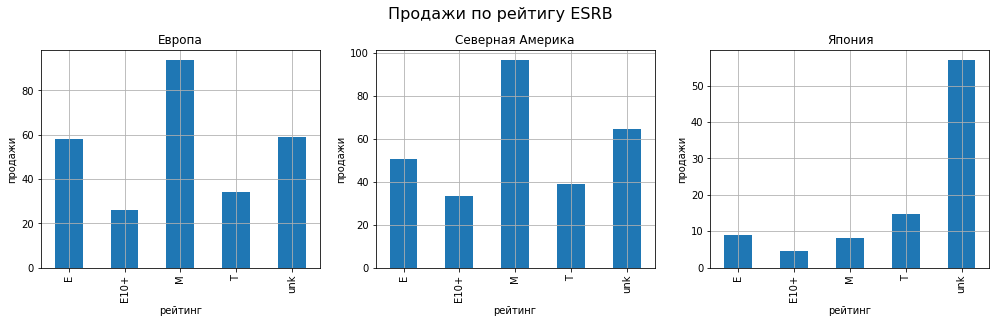

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))
fig.suptitle('Продажи по рейтигу ESRB', fontsize=16, y=1.03)
rating_by_region.plot(x='rating', y='eu_sales', ax=axes[0],
           kind='bar', grid=True, xlabel='рейтинг', ylabel='продажи', legend=False)
axes[0].set_title('Европа')
rating_by_region.plot(x='rating', y='na_sales', ax=axes[1],
           kind='bar', grid=True, xlabel='рейтинг', ylabel='продажи', legend=False)
axes[1].set_title('Северная Америка')
rating_by_region.plot(x='rating', y='jp_sales', ax=axes[2],
           kind='bar', grid=True, xlabel='рейтинг', ylabel='продажи', legend=False)
axes[2].set_title('Япония');

In [56]:
rating_by_region.sort_values(by='jp_sales', ascending=False)

,rating,eu_sales,jp_sales,na_sales
4,unk,58.95,56.90,64.72
3,T,34.07,14.78,38.95
0,E,58.06,8.94,50.74
2,M,93.44,8.01,96.42
1,E10+,26.16,4.46,33.23


<div style="border:solid green 1px; padding: 10px">

В Северной Америке и Европе распределение продаж от рейтинга одинаково.

1. Игры с рейтингом `М` («Mature» — «От 17 лет») преобладают:
* Северная Америка - 96.42 млн. копий
* Европа - 93.44 млн. копий
2. Игры с рейтингом `E` («Everyone» — «Для всех») на втором месте:
* Северная Америка - 50.74 млн. копий
* Европа - 58.06 млн. копий
3. Игры с рейтингом `T` («Teen» — «Подросткам 13—19 лет») на третьем месте:
* Северная Америка - 38.95 млн. копий
* Европа - 34.07 млн. копий
4. Игры с рейтингом `E10+` («Everyone 10 and older» — «Для всех старше 10 лет») на четвертом месте:
* Северная Америка - 33.23 млн. копий
* Европа - 26.16 млн. копий

Распределение в Японии:
1. Игры с рейтингом `T` преобладают (14.78);
2. Игры с рейтингом `E` на втором месте (8.94);
3. Игры с рейтингом `М` на третьем месте (8.01);
4. Игры с рейтингом `E10+`на четвертом месте (4.46).

Также есть большая доля в каждом регионе игр с неопределенным рейтингом `unk` и, вполне возможно, что будь эти значения изначально не пустыми, распределение продаж по рейтингу был бы другим. Возможно для какого-то рынка (к примеру, Япония) преобладание игр без рейтинга это норма и ключевая особенность.

###  Cамые популярные платформы и жанры по другим регионам

In [57]:
# самые популярные платформы
platform_other_regions = (analyzed_period
                .pivot_table(index='platform', values='other_sales', aggfunc='sum')
                .reset_index().sort_values('other_sales', ascending=False).head()
)
platform_other_regions

,platform,other_sales
3,PS4,44.48
9,XONE,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


In [58]:
other_platforms = platform_other_regions['platform']

# Доля продаж в регионе от общей суммы продаж по топ-5 платформам
print('Доля продаж в других регионах от общих:', (platform_other_regions['other_sales'].sum()
 / analyzed_period.query('platform in @other_platforms')['total_sales'].sum() * 100))

Доля продаж в других регионах от общих: 11.779793853607547


In [59]:
# самые популярные жанры 
genre_other_regions = (analyzed_period
                .pivot_table(index='genre', values='other_sales', aggfunc='sum')
                .reset_index().sort_values('other_sales', ascending=False))
genre_other_regions

,genre,other_sales
0,action,22.57
8,shooter,21.53
10,sports,14.36
7,role-playing,8.64
3,misc,4.03
6,racing,2.89
2,fighting,2.73
1,adventure,1.82
4,platform,1.81
9,simulation,0.89


In [60]:
# продажи по рейтигу ESRB
rating_other_regions = (analyzed_period
                .pivot_table(index='rating', values='other_sales', aggfunc='sum')
                .reset_index().sort_values('other_sales', ascending=False)
)
rating_other_regions

,rating,other_sales
2,M,28.67
4,unk,18.40
0,E,15.39
3,T,11.33
1,E10+,7.83


## Проверка гипотез

### Средние оценки пользователей платформ XOne и PC

Нужно провести сравнение средних оценок пользователями игр на платформах `XOne` и `PC`, и понять различаются ли они. Определим формулировку для нулевой и альтернативной гипотезы:

Нулевая гипотеза (Но) - средние оценки пользователей платформ `XOne` и `PC` равны.

Альтернативная гипотеза (Н1) - средние оценки пользователей платформ `XOne` и `PC` не равны.

Пороговое значение `alpha` - критический уровень статистической значимости, примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу. P-value — это вероятность ошибки при отклонении нулевой гипотезы.

Для проверки гипотез используем столбец `user_score`, т.к. в нем сохранены значения оценок пользователями игр.

In [61]:
# проверка Но
alpha = 0.05
results = st.ttest_ind(
    analyzed_period.query('platform == "XONE"  and user_score.notna()')['user_score'], 
    analyzed_period.query('platform == "PC"  and user_score.notna()')['user_score']
)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03929868432092195
Отвергаем нулевую гипотезу


In [62]:
# посчитаем на сколько различаются cредние
(((analyzed_period.query('platform == "XONE" and user_score.notna()')['user_score'].mean()
   - analyzed_period.query('platform == "PC" and user_score.notna()')['user_score'].mean())
  / analyzed_period.query('platform == "PC" and user_score.notna()')['user_score'].mean())*100)

4.623005590313225

<div style="border:solid green 1px; padding: 10px">

Полученное значение p-value говорит о том, с вероятностью почти 4% такое или большее различие можно получить случайно.Такая вероятность случайно получить различие в значениях показателя, дает возможность задуматься о различии в средних оценок пользователей по платформам `XOne` и `PC`.

Среднее по оценкам пользователей по платформе `PC`, за анализирцемый период с 2014г. по 2016г., отличается от среднего по оценкам пользователей по платформе `XOne` на ~ 4,7%.

###  Средние оценки пользователей  жанров Action и Sports

Нужно провести сравнение средних оценок пользователями игр в жанрах `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования»), и понять различаются ли они. Определим формулировку для нулевой и альтернативной гипотезы:

Нулевая гипотеза (Но) - средние оценки пользователей жанров `Action` и `Sports` равны.

Альтернативная гипотеза (Н1) - средние оценки пользователей жанров `Action` и `Sports` не равны.

Пороговое значение `alpha` - критический уровень статистической значимости, примем как 0,05 (5%). Если p-value окажется меньше него - отвергнем гипотезу. P-value — это вероятность ошибки при отклонении нулевой гипотезы.

Для проверки гипотез используем столбец `user_score`, т.к. в нем сохранены значения оценок пользователями игр.

In [63]:
# проверка Но
alpha = 0.05
results = st.ttest_ind(
    analyzed_period.query('genre == "action" and user_score.notna()')['user_score'], 
    analyzed_period.query('genre == "sports" and user_score.notna()')['user_score']
)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2740824489804524e-34
Отвергаем нулевую гипотезу


In [64]:
# посчитаем на сколько различаются cредние 
(((analyzed_period.query('genre == "action" and user_score.notna()')['user_score'].mean()
   - analyzed_period.query('genre == "sports" and user_score.notna()')['user_score'].mean())
  / analyzed_period.query('genre == "sports" and user_score.notna()')['user_score'].mean())*100)

24.782298174362

**<font color='green'>Вывод</font>**

Значение p-value 1.2740824489804524e-34 - это практически 0, что говорит о том, что такое или большее различие практически не возможно получить случайно. Это дает возможность делать вывод о значимом различии между средними оценками пользователей игр в жанрах `action` и `sports`.

Среднее по оценкам пользователей по платформе `action`, за анализирцемый период с 2014г. по 2016г., отличается от среднего по оценкам пользователей по платформе `sports` на ~ 24,8%

## <font color='green'>Общий вывод</font>

<div style="border:solid green 2px; padding: 20px">

Нам доступны из открытых источников исторические данные до 2016г. о продажах игр, с оценками пользователей и экспертов, жанрами и платформами. Нам нужно было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры.
       
Мы изучили выборку и выявили, что:

**1.** В исходных данных довольно много пропусков в столбцах, содержащих:

- оценки критиков (8578 значений пропущено) - заполнены медианой в зависимости от жанра игры;
- оценки пользователей (6701 значений пропущено) - заполнены медианой в зависимости от жанра игры;
- рейтинге от организации ESRB (6766 значений пропущено) - заполнено начением `unk`.
    
**2.** Меньше всего игр пришлось, согласно данным, на 1980г. (всего 9 шт.), а больше всего выпустили в 2008г. (1427 шт.). Быстрое увеличение количества выпускаемых игр началось с 1994г. (с 60 шт. в 1993г. до 121 шт. в 1994г.), но резкий скачек произошел в 2002г. (с 482 шт. в 2001г. до 829 шт. в 2002г.).    
    
**3.** Распределение суммы продаж по годам говорит, что больше всего продано копий в тот же год, что и выпущено максимальное количество игр - 2008г. (671.46 млн. копий на 8 платформах), далее идет спад.
Мы взяли из исходных данных выборку за период в 2 года с 2014г. по 2015г. и 2016г. (в описании данных говорилось, что 2016г. может быть не полным по данным, поэтому 2 года и "довесок").

**4.** 10 платформ за анализируемый период имеют суммарную выручку по продажам игр (в млн. копий) выше 20 млн. копий. Мы выбрали несколько платформ как ТОП-5:

- `PS4`, `XOne` как стационарные консоли;
- `3DS`, `PSV` как портативные консоли;
- `РС` как альтернативную консолям платформу.
    
Стандартное отклонение по этим платформам, позволяет предположить, что значения не совсем однородны, на среднее влияют "выбросы" в данных.

Нет сильной корреляции продаж от отзывов пользователей или критиков по ТОП-5 платформ (умеренная от оценок критиков и слабая от оценок пользователей). 
    
**5.** Самые прибыльные жанры за анализируемый период, это `action` (619 игр в размере 199,36 млн. копий), `shooter` (128 игр в размере 170,94 млн. копий), `sports` (161 игрa в размере 109,48 млн. копий), `role-playing` (221 игрa в размере 101,44 млн. копий) и `misc` (113 игр в размере 37,55 млн. копий). Хуже всего продажи шли по жанрам `strategy` и `рuzzle`.
    
**6.** По отдельным регионам ТОП-5 платформ распределился так:

- в Северной Америке 
    `PS4` (98.61), `XOne` (81.27), `X360` (28.30), `3DS` (22.64), `PS3` (22.05) и продажи в этом регионе составляют чуть больше 40% от общих продаж по этим платформам;
- в Европе - `PS4` (130.04), `XOne` (46.25), `PS3` (25.54), `PC` (17.97), `3DS` (16.12)  и продажи в этом регионе составляют чуть больше 38% от общих продаж по этим платформам;
- в Японии - `3DS` (44.24), `PS4` (15.02), `PSV` (14.54), `PS3` (11.22), `Wiiu` (7.31)  и продажи в этом регионе составляют чуть больше 18% от общих продаж по этим платформам.

Если соотнести платформы с их "новизной", то наиболее актуальны (на конец 2016г.): `PS4`, `XOne`, `PC`, `3DS`,  `PSV`,  `Wiiu`, что совпадает с выделенным нами ранее списком ТОП-5 платформ.

**7.** А ТОП-5 жанров так:
    
- в Северной Америке -
    `shooter` (79.02), `action` (72.53), `sports` (46.13), `role-playing` (33.47), `misc` (15.05);
- в Европе -
    `action` (74.68), `shooter` (65.52), `sports` (45.73), `role-playing` (28.17), `racing` (14.13);
- в Японии -
    `role-playing` (31.16), `action` (29.58), `fighting` (6.37), `misc` (5.61), `shooter` (4.87).
    
Такие различия в предподтчении жанров между Японией и Европой/Северной Америкой могут быть из-за культуры народа или размера жилья, что заставлчет выбирать более компактные платформы, или требованийк графике и пр. 
    
**8.** В Северной Америке и Европе распределение продаж от рейтинга одинаково.

1. Игры с рейтингом `М` («Mature» — «От 17 лет») преобладают:
* Северная Америка - 96.42 млн. копий
* Европа - 93.44 млн. копий
2. Игры с рейтингом `E` («Everyone» — «Для всех») на втором месте:
* Северная Америка - 50.74 млн. копий
* Европа - 58.06 млн. копий
3. Игры с рейтингом `T` («Teen» — «Подросткам 13—19 лет») на третьем месте:
* Северная Америка - 38.95 млн. копий
* Европа - 34.07 млн. копий
4. Игры с рейтингом `E10+` («Everyone 10 and older» — «Для всех старше 10 лет») на четвертом месте:
* Северная Америка - 33.23 млн. копий
* Европа - 26.16 млн. копий

Распределение в Японии:
1. Игры с рейтингом `T` преобладают (14.78);
2. Игры с рейтингом `E` на втором месте (8.94);
3. Игры с рейтингом `М` на третьем месте (8.01);
4. Игры с рейтингом `E10+`на четвертом месте (4.46).

Также есть большая доля в каждом регионе игр с неопределенным рейтингом `unk` и, вполне возможно, что будь эти значения изначально не пустыми, распределение продаж по рейтингу был бы другим. Возможно для какого-то рынка (к примеру, Япония) преобладание игр без рейтинга это норма и ключевая особенность.
    
    
Были проверены две гипотезы и установлено, что за анализирцемый период с 2014г. по 2016г.:

* Средние оценки пользователей игр в жанре `action` и в жанре `sports` различаются. Среднее по оценкам пользователей по платформе `action`, за анализирцемый период с 2014г. по 2016г., отличается от среднего по оценкам пользователей по платформе `sports` на ~ 24,8%
* Средние оценки пользователей игр для платформ `XOne` и `РС` различаются. Среднее по оценкам пользователей по платформе `PC`, за анализирцемый период с 2014г. по 2016г., отличается от среднего по оценкам пользователей по платформе `XOne` на ~ 4,7%.
    
Итак, сейчас конец года, и чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в будущем году нужно обратить внимание на то, что:
- рынок Северной Америки, Европы и прочих отличается от Японии;
- популярны жанры `action`, `sports`, `shooter`, `misc`, `racing`, `role-playing`;
- лучше всего продаются игры для всех, для людей от 17 лет и для подростков 13-19 лет;
- больше игр покупались для платформ Xbox (One), PS (PS4, PSV), Nintendo(3DS) и PC.